In [1]:
# bibliotecas necessárias
import pandas as pd               # Para manipulação de dados em formato tabular
import numpy as np                # Para cálculos numéricos
import datetime as dt             # Para lidar com datas e horários
from itertools import chain      # Para manipulação de iterações
from scipy import stats as st    # Para cálculos estatísticos

# Importe bibliotecas de plotagem
import matplotlib as plot
import matplotlib.pyplot as plt  # Para criar gráficos
import seaborn as sns            # Para visualização de dados mais atraente

from collections import Counter


import numpy as np
from scipy import stats as st
pd.options.display.float_format = '{:.2f}'.format

In [2]:
# Importação do dataframe
try:
    mega_cleaned = pd.read_csv('mega_cleaned.csv')
except FileNotFoundError:
    print("O arquivo CSV não foi encontrado em nenhuma das localizações especificadas.")

In [3]:
# Visualização do dataframe
mega_cleaned.head()

,sorteio,ano,mes,n1,n2,n3,n4,n5,n6,data
0,14-29-30-46-48-51,1998,1,14,29,30,46,48,51,1998-01-02
1,4-10-17-24-30-54,2003,1,4,10,17,24,30,54,2003-01-02
2,27-29-43-44-45-54,2006,1,27,29,43,44,45,54,2006-01-02
3,6-10-12-17-28-53,2012,1,6,10,12,17,28,53,2012-01-02
4,15-18-24-42-46-56,2014,1,15,18,24,42,46,56,2014-01-02


In [4]:
# Dados do dataframe
mega_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1853 entries, 0 to 1852
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   sorteio  1853 non-null   object
 1   ano      1853 non-null   int64 
 2   mes      1853 non-null   int64 
 3   n1       1853 non-null   int64 
 4   n2       1853 non-null   int64 
 5   n3       1853 non-null   int64 
 6   n4       1853 non-null   int64 
 7   n5       1853 non-null   int64 
 8   n6       1853 non-null   int64 
 9   data     1853 non-null   object
dtypes: int64(8), object(2)
memory usage: 144.9+ KB


In [5]:
# retirando o hífem da sequência de sorteio
#mega_cleaned['sorteio'] = mega_cleaned['sorteio'].str.replace("-","")

# transformando a coluna sorteio de objetc pata int
#mega_cleaned['sorteio'] = pd.to_numeric(mega_cleaned['sorteio'], errors='raise')

# transformando a coluna data de objetc pata datetime
mega_cleaned['data'] = pd.to_datetime(mega_cleaned['data'], format="%Y-%m-%d")

In [6]:
# Dados do dataframe
mega_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1853 entries, 0 to 1852
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   sorteio  1853 non-null   object        
 1   ano      1853 non-null   int64         
 2   mes      1853 non-null   int64         
 3   n1       1853 non-null   int64         
 4   n2       1853 non-null   int64         
 5   n3       1853 non-null   int64         
 6   n4       1853 non-null   int64         
 7   n5       1853 non-null   int64         
 8   n6       1853 non-null   int64         
 9   data     1853 non-null   datetime64[ns]
dtypes: datetime64[ns](1), int64(8), object(1)
memory usage: 144.9+ KB


In [7]:
# Distribuição do dataframe
mega_cleaned.describe()

,ano,mes,n1,n2,n3,n4,n5,n6
count,1853.00,1853.00,1853.00,1853.00,1853.00,1853.00,1853.00,1853.00
mean,2007.18,6.54,8.58,17.18,26.26,35.13,43.69,52.39
std,5.53,3.42,7.05,9.15,10.00,9.87,9.01,6.71
min,1996.00,1.00,1.00,2.00,3.00,8.00,11.00,22.00
25%,2003.00,4.00,3.00,10.00,19.00,28.00,38.00,49.00
50%,2007.00,7.00,7.00,16.00,26.00,35.00,45.00,54.00
75%,2012.00,9.00,12.00,23.00,33.00,43.00,51.00,58.00
max,2016.00,12.00,46.00,48.00,54.00,58.00,59.00,60.00


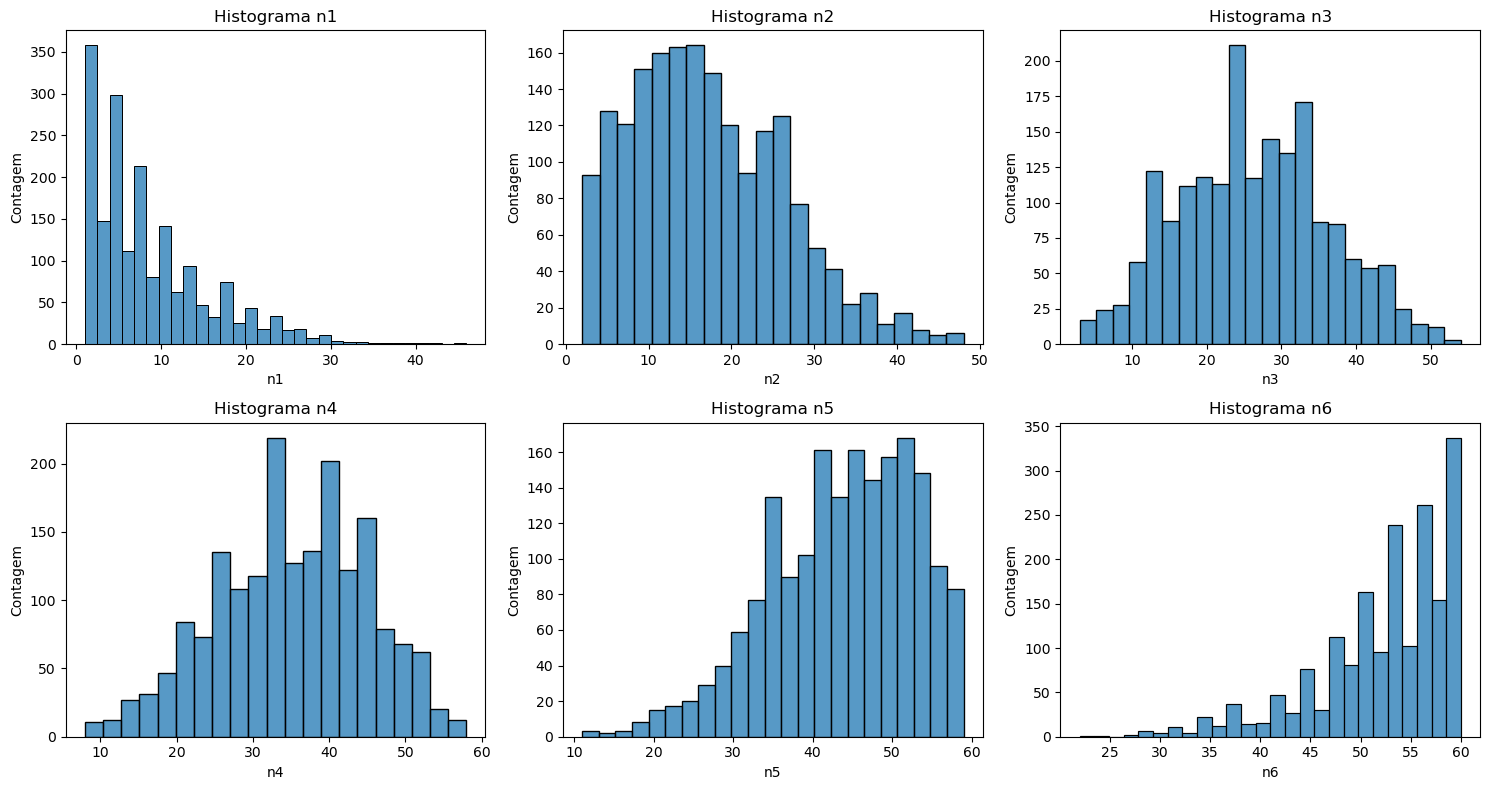

In [8]:

# Crie uma figura com duas linhas e três colunas
fig, axes = plt.subplots(2, 3, figsize=(15, 8))

# Reshape do array de eixos para facilitar o acesso
axes = axes.flatten()

# Loop sobre as colunas de n1 a n6
for i in range(1, 7):
    # Selecione o eixo apropriado
    ax = axes[i - 1]
    
    # Crie o histograma usando seaborn
    sns.histplot(x=f'n{i}', data=mega_cleaned, ax=ax)
    
    # Adicione rótulos e título se necessário
    ax.set_xlabel(f'n{i}')
    ax.set_ylabel('Contagem')
    ax.set_title(f'Histograma n{i}')

# Ajuste o layout para evitar sobreposição
plt.tight_layout()

# Exiba os gráficos
plt.show()

In [9]:
# Criação de uma lista com todos os numeros sorteados
mega_num = mega_cleaned[['n1', 'n2', 'n3', 'n4', 'n5', 'n6']]

mega_list = mega_num.values.flatten().tolist()

In [10]:
# Tamanho da lista
len(mega_list)

11118

In [11]:
# Função para ver o numero mais frequente na lista
def numero_mais_repetido(lista):
    contagem = Counter(lista)
    numero_mais_comum = contagem.most_common(1)[0][0]
    return numero_mais_comum

# Salvando o resultado
resultado = numero_mais_repetido(mega_list)

# Imprimindo o resultado
print("O número mais repetido na lista é:", resultado)


O número mais repetido na lista é: 5


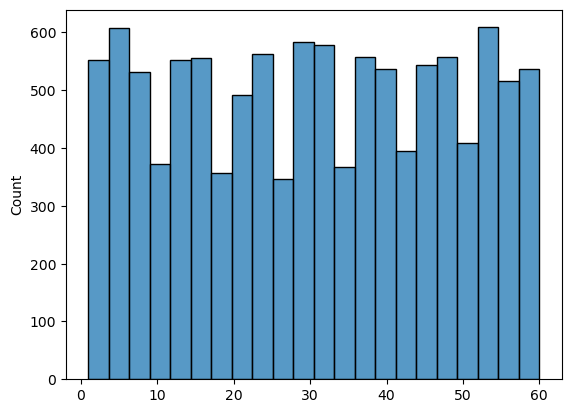

In [12]:
# Histograma da lista
sns.histplot(data=mega_list)
plt.show()

In [13]:
# Colunas a serem utilizadas
colunms_num = ['n1', 'n2', 'n3', 'n4', 'n5', 'n6']

Números mais comuns:

In [14]:
# Os números mais comuns na lista
num_comum = mega_cleaned[colunms_num].mode()
num_comum

,n1,n2,n3,n4,n5,n6
0,1,13,28,33,51,60


In [15]:
# Os numeros mais comuns por ano
moda_por_ano = mega_cleaned.groupby('ano')[colunms_num].apply(lambda x: x.mode().iloc[0]
                                                                     if not x.mode().empty else None)

# Os numeros mais comuns por mes
moda_por_mes = mega_cleaned.groupby('mes')[colunms_num].apply(lambda x: x.mode().iloc[0]
                                                                     if not x.mode().empty else None)


In [16]:
moda_por_ano

,n1,n2,n3,n4,n5,n6
ano,,,,,,
1996,3.00,5.00,17.00,38.00,52.00,56.00
1997,2.00,18.00,28.00,25.00,44.00,59.00
1998,1.00,13.00,19.00,37.00,42.00,59.00
1999,1.00,10.00,17.00,35.00,41.00,58.00
2000,3.00,16.00,29.00,37.00,41.00,55.00
2001,5.00,16.00,20.00,25.00,47.00,53.00
2002,5.00,12.00,22.00,38.00,45.00,54.00
2003,3.00,8.00,23.00,34.00,38.00,58.00
2004,6.00,13.00,18.00,30.00,50.00,59.00


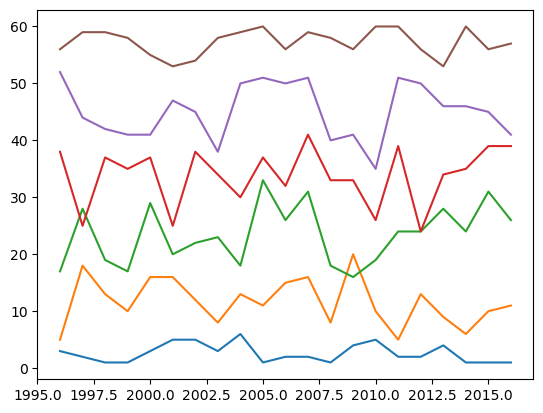

In [17]:
# Grafico dos numeros mais comuns por ano
for column in moda_por_ano.columns:
    plt.plot(moda_por_ano.index, moda_por_ano[column], label=column)

In [18]:
moda_por_mes

,n1,n2,n3,n4,n5,n6
mes,,,,,,
1,1.00,13.00,28.00,27.00,52.00,53.00
2,1.00,5.00,28.00,44.00,52.00,58.00
3,2.00,16.00,28.00,39.00,51.00,59.00
4,2.00,14.00,30.00,37.00,44.00,54.00
5,1.00,18.00,26.00,33.00,45.00,60.00
6,3.00,4.00,17.00,40.00,42.00,60.00
7,5.00,10.00,23.00,41.00,54.00,59.00
8,1.00,11.00,18.00,35.00,35.00,59.00
9,4.00,13.00,29.00,37.00,41.00,51.00


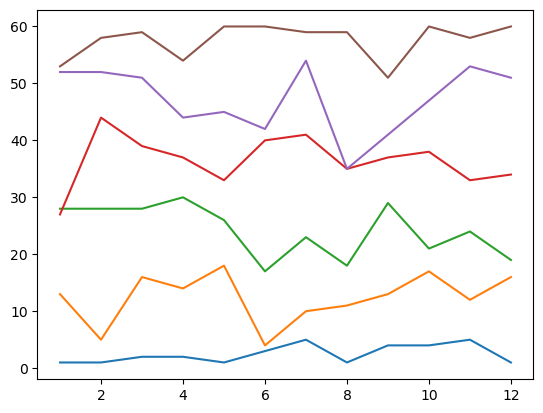

In [19]:
# Grafico dos numeros mais comuns por mes
for column in moda_por_mes.columns:
    plt.plot(moda_por_mes.index, moda_por_mes[column], label=column)

In [20]:
# Os numeros mais comuns por ano e mes
moda_por_ano_mes = mega_cleaned.groupby(['ano','mes'])[colunms_num].apply(lambda x: x.mode().iloc[0]
                                                                     if not x.mode().empty else None)


In [21]:
print("Os numeros mais comuns por ano e mês")
moda_por_ano_mes

Os numeros mais comuns por ano e mês


0          n1    n2    n3    n4    n5    n6
ano  mes                                   
1996 1   1.00  5.00  6.00 19.00 20.00 51.00
     3   4.00 11.00 21.00 23.00 54.00 47.00
     4   3.00  5.00 19.00 21.00 38.00 47.00
     5   4.00  9.00 19.00 38.00 27.00 43.00
     6   8.00 19.00 28.00 45.00 48.00 60.00
...       ...   ...   ...   ...   ...   ...
2016 8   1.00  5.00 11.00 22.00 35.00 57.00
     9   1.00  9.00 13.00 22.00 25.00 51.00
     10  2.00  9.00 23.00 28.00 45.00 53.00
     11  1.00  4.00 26.00 30.00 34.00 49.00
     12  1.00  3.00  4.00 39.00 51.00 53.00

[251 rows x 6 columns]

In [22]:
print("O número mais repetido na lista é:", resultado)
print("")
print("O números mais repetidos na lista são:")
num_comum

O número mais repetido na lista é: 5

O números mais repetidos na lista são:


,n1,n2,n3,n4,n5,n6
0,1,13,28,33,51,60
